In [2]:
# Importar pacotes:
import pandas as pd
import numpy as np

In [3]:
# Carregar o banco de dados
dados = pd.read_excel('banco_aeronaves.xlsx')

# Exibir as primeiras linhas para verificar os dados
print(dados.head())

   Distancia  Potencia        T_Prop Uso_comercial
0    3575.77      2160  Convencional           Sim
1    3803.76      1990      Elétrico           Não
2    5962.33      2350      Elétrico           Sim
3    5569.17      2100  Convencional           Sim
4    2593.53      1620      Elétrico           Não


**Análise Descritiva das variáveis:**

Dados fictícios de 50 aeronaves:

*   Distância Máxima de Voo (em km) - Distancia
*   Potência motor (kW) - Potencia
*   Tipo de Propulsão (Convencional, Elétrico) - T_Prop
*   Aeronave de Uso Comercial(Não, Sim) - Uso_comercial











In [4]:
# n:
print("n:", dados['Distancia'].count())

# Média:
print("Média:", round(dados['Distancia'].mean(), 4))

# Mediana:
print("Mediana:", round(dados['Distancia'].median(), 4))

# Mínimo:
print("Mínimo:", round(dados['Distancia'].min(), 4))

# Máximo:
print("Máximo:", round(dados['Distancia'].max(), 4))

# Variância:
print("Variância:", round(dados['Distancia'].var(), 4))

# Desvio padrão:
print("Desvio padrão:", round(dados['Distancia'].std(), 4))

n: 50
Média: 4384.1112
Mediana: 4399.78
Mínimo: 2593.53
Máximo: 6235.51
Variância: 858515.9687
Desvio padrão: 926.5614


In [5]:
# Descriva geral variáveis quantitativas:
round(dados[['Distancia','Potencia']].describe(),4)

,Distancia,Potencia
count,50.0000,50.0000
mean,4384.1112,2005.0000
std,926.5614,191.6976
min,2593.5300,1620.0000
25%,3767.8725,1900.0000
50%,4399.7800,2020.0000
75%,5065.7850,2150.0000
max,6235.5100,2400.0000


In [6]:
# Descriva geral variáveis qualitativas:
# Frequencias absolutas:
print(" Tipo de Propulsão:\n", dados['T_Prop'].value_counts())
print("\n Aeronave de Uso Comercial:\n", dados['Uso_comercial'].value_counts())

 Tipo de Propulsão:
 Convencional    25
Elétrico        25
Name: T_Prop, dtype: int64

 Aeronave de Uso Comercial:
 Sim    30
Não    20
Name: Uso_comercial, dtype: int64


**Gráficos para as variáveis:**

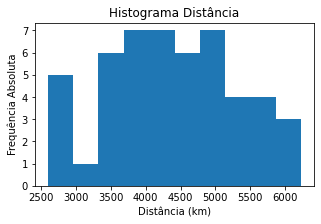

In [7]:
import matplotlib.pyplot as plt # Função para os gráficos
# Histograma para a Distancia:
plt.figure(figsize=(5, 3)) # Tamanho da figura
plt.hist(dados['Distancia'])
plt.title('Histograma Distância')
plt.xlabel('Distância (km)')
plt.ylabel('Frequência Absoluta')
plt.show()

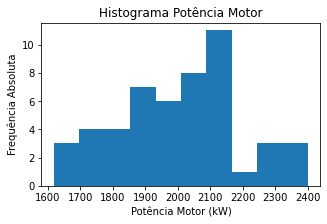

In [8]:
# Histograma para a Potencia:
plt.figure(figsize=(5, 3)) # Tamanho da figura
plt.hist(dados['Potencia'])
plt.title('Histograma Potência Motor')
plt.xlabel('Potência Motor (kW)')
plt.ylabel('Frequência Absoluta')
plt.show()

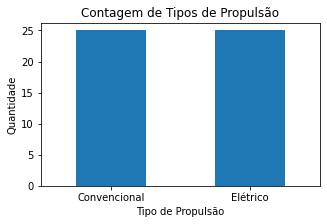

In [9]:
# Gráfico de barras para a T_Prop:
plt.figure(figsize=(5, 3)) # Tamanho da figura
dados['T_Prop'].value_counts().plot(kind='bar')
plt.xticks(rotation=0) # Deixar a escrita do eixo x na horizontal
plt.title('Contagem de Tipos de Propulsão')
plt.xlabel('Tipo de Propulsão')
plt.ylabel('Quantidade')
plt.show()

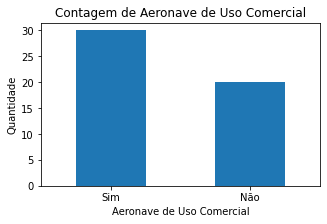

In [10]:
# Gráfico de barras para Uso_comercial:
plt.figure(figsize=(5, 3)) # Tamanho da figura
dados['Uso_comercial'].value_counts().plot(kind='bar')
plt.xticks(rotation=0) # Deixar a escrita do eixo x na horizontal
plt.title('Contagem de Aeronave de Uso Comercial')
plt.xlabel('Aeronave de Uso Comercial')
plt.ylabel('Quantidade')
plt.show()

**Testes de hipóteses:**

**Definição de p-valor:**

O **p-valor** é a probabilidade de obter uma estatística de teste igual ou mais extrema do que a observada na amostra, assumindo que a hipótese nula ($H_0$) seja verdadeira. Em testes de hipóteses, o p-valor é usado para decidir se há evidências suficientes para rejeitar a hipótese nula.

A fórmula para o p-valor é dada por (unilateral):

$$
p\text{-valor} = P(\text{Estatística de teste} \geq \text{Valor observado} \mid H_0 \text{ verdadeira}).
$$

**Decisão:**
Se o p-valor for menor ou igual ao nível de significância ($\alpha$), rejeita-se $H_0$, indicando que o resultado é estatisticamente significativo. Caso contrário, não rejeita-se $H_0$, significando que os dados não fornecem evidências suficientes para comprovar a hipótese alternativa.

$$
\begin{cases}
p\text{-valor} \leq \alpha \quad \Rightarrow \quad \text{Rejeitar } H_0\\
p\text{-valor} > \alpha \quad \Rightarrow \quad \text{Não rejeitar } H_0
\end{cases}
$$

In [11]:
# Função para testar a hipoteses:
def testar_hipotese(p_valor, alpha=0.05):
    if p_valor <= alpha:
        return "Rejeita-se a hipótese nula. (Aceita H1)"
    else:
        return "Não rejeita-se a hipótese nula. (Aceita H0)"

In [12]:
# Filtando os dados do Tipo de Propulsão para a distancia:
convencional = dados[dados['T_Prop'] == 'Convencional']['Distancia']
eletrico = dados[dados['T_Prop'] == 'Elétrico']['Distancia']
print("Dados Convencional:\n", convencional.head())
print("\nDados Elétrico:\n", eletrico.head())

Dados Convencional:
 0     3575.77
3     5569.17
5     2741.16
12    5727.82
13    2626.96
Name: Distancia, dtype: float64

Dados Elétrico:
 1    3803.76
2    5962.33
4    2593.53
6    4961.97
7    3678.89
Name: Distancia, dtype: float64


In [ ]:
#Teste t para o Tipo de Propulsão referente a distancia:
from scipy.stats import ttest_ind # função do teste t para duas médias indenpedentes
from scipy.stats import bartlett # função do teste para as variâncias

# Primeiro verificar a variância:
bartlett(convencional, eletrico) # Teste para variâncias

# p-valor maior que alpha 0,05, Não rejeitamos H0. As variâncias são iguais.

BartlettResult(statistic=0.327259215279123, pvalue=0.5672774357125698)

In [14]:
# H0: sigma2_1 = sigma2_2
# H1: sigma2_1 dif sigma2_2
testar_hipotese(0.5673)

'Não rejeita-se a hipótese nula. (Aceita H0)'

In [15]:
# Testar de há diferença entre as distancias percorridas com os diferentes tipos de propulsão
# considerando variancias iguais:

# alternative= 'greater' (direita) ou 'less' (esquerda) ou 'two-sided' (bilateral)

ttest_ind(convencional, eletrico, equal_var=True, alternative = 'two-sided')

# Considerando um alpha = 0,05, com 48 graus de liberdade (aprox 50 na tabela)
# o t tabelado é +- 2,009. Portanto, -2,009 < -1.98 < 2,009, Aceita H0.

Ttest_indResult(statistic=-1.9845924008236167, pvalue=0.052921950882972524)

In [16]:
# H0: mu_1 = mu_2
# H1: mu_1 dif mu_2
testar_hipotese(0.0529)
# Os tipos de Propulsão não tem diferença na distancia percorrida

'Não rejeita-se a hipótese nula. (Aceita H0)'

In [17]:
# Teste qui-quadrado:
from scipy.stats import chi2_contingency # função do teste qui-quadrado

#teste entre T_prop e Uso_comercial:
contingency_table = pd.crosstab(dados['T_Prop'], dados['Uso_comercial'])
print(contingency_table,"\n")
print(chi2_contingency(contingency_table,correction=False))

Uso_comercial  Não  Sim
T_Prop                 
Convencional     8   17
Elétrico        12   13 

(1.3333333333333335, 0.2482130789899202, 1, array([[10., 15.],
       [10., 15.]]))


In [18]:
# H0: Não tem associação
# H1: Tem associação
testar_hipotese(0.2482)
# Não existe associação entre o uso comercial e o tipo de propulsão

'Não rejeita-se a hipótese nula. (Aceita H0)'

In [19]:
# Testar se a distancia percorrida é diferente que 4500:

# alternative= 'greater' (direita) ou 'less' (esquerda) ou 'two-sided' (bilateral)

#test t para uma amostra:
from scipy.stats import ttest_1samp # função do teste t para uma amostra

ttest_1samp(dados['Distancia'], 4500, alternative='two-sided')

Ttest_1sampResult(statistic=-0.8844072197889457, pvalue=0.3807956078908511)

In [20]:
# H0: mu = 4500
# H1: mu dif 4500
testar_hipotese(0.3808)
# Temos que a nossa média populacional das distancias percorridas é de 4500 km

'Não rejeita-se a hipótese nula. (Aceita H0)'

**Correlação e Regressão:**

In [21]:
# Correlação de Pearson para a distância e potência:
print("Correlação de Pearson:", round(dados['Distancia'].corr(dados['Potencia']), 4))

# Teste para verificar a correlação:
from scipy.stats import pearsonr

#pearsonr(dados['Distancia'], dados['Potencia'])
print("p-valor:", f"{pearsonr(dados['Distancia'], dados['Potencia'])[1]:.4e}")

Correlação de Pearson: 0.8285
p-valor: 1.1228e-13


In [22]:
# H0: Não tem correlação (r = 0)
# H1: Tem correlação (r dif 0)
testar_hipotese(1.1228e-13)
# Temos então existencia de correlação

'Rejeita-se a hipótese nula. (Aceita H1)'

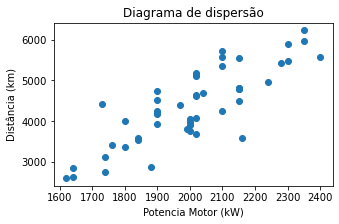

In [23]:
# Diagrama de dispersão:
plt.figure(figsize=(5, 3)) # Tamanho da figura
plt.scatter(dados['Potencia'],dados['Distancia']) # (X,Y)
plt.title('Diagrama de dispersão')
plt.xlabel('Potencia Motor (kW)')
plt.ylabel('Distância (km)')
plt.show()

In [24]:
# Modelo de regressão linear simples:
y = dados['Distancia']
X = dados['Potencia']

import statsmodels.api as sm

X1 = sm.add_constant(X)
model = sm.OLS(y, X1).fit()
# Coeficientes do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Distancia   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     105.1
Date:                Sun, 06 Apr 2025   Prob (F-statistic):           1.12e-13
Time:                        14:08:10   Log-Likelihood:                -383.03
No. Observations:                  50   AIC:                             770.1
Df Residuals:                      48   BIC:                             773.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3644.8033    786.836     -4.632      0.0

In [25]:
# Informações importantes do modelo:
print("Coeficientes do modelo de regressão linear simples:")
print("Intercepto (a):", round(model.params.iloc[0], 4))
print("Coeficiente (b):", round(model.params.iloc[1],4))
print("R-quadrado (R²):", round(model.rsquared, 4))
print(f"p-valor intercepto (a): {model.pvalues.iloc[0]:.4e}")
print(f"p-valor coeficiente (b): {model.pvalues.iloc[1]:.4e}")

Coeficientes do modelo de regressão linear simples:
Intercepto (a): -3644.8033
Coeficiente (b): 4.0044
R-quadrado (R²): 0.6864
p-valor intercepto (a): 2.7859e-05
p-valor coeficiente (b): 1.1228e-13


In [26]:
# H0: Parametro não significativo (Não existe regressão)
# H1: Parametro significativo (Existe regressão)

# Teste de significância:
print(testar_hipotese(2.7859e-05))
print(testar_hipotese(1.1228e-13))
# Intercepto (a) e coeficiente (b) são significativos, temos regressão.
# Para ser considerado regressão precisamos ter pelo menos (b) significativo.
# (Aceitar H1)

Rejeita-se a hipótese nula. (Aceita H1)
Rejeita-se a hipótese nula. (Aceita H1)


Temos:
$$Y = -3644{,}8033 + 4{,}0044X $$

$$\text{ou}$$

$$\text{Distancia} = -3644{,}8033 + 4{,}0044\times\text{Potencia}$$


$R^2$ = 0,6864, a explicabilidade do modelo é de 68,64%.

**Exemplo:** Considerando uma potencia de 2250 kW teriamos:

$\text{Distancia} = -3644{,}8033 + 4{,}0044\times2250$

$\text{Distancia} = -3644{,}8033 + 9009{,}9$

$\text{Distancia} = 5365{,}0967 \text{ km}$

Substituimos valores de X em nosso modelo e obtemos estimativas de Y.

In [27]:
# Predizendo valores com o modelo ajustado
y_pred = model.predict(X1)
print(" Predito:\n", y_pred.head())
print("\n Observado:\n", y.head())

 Predito:
 0    5004.800348
1    4324.044508
2    5765.645110
3    4764.533581
4    2842.399445
dtype: float64

 Observado:
 0    3575.77
1    3803.76
2    5962.33
3    5569.17
4    2593.53
Name: Distancia, dtype: float64


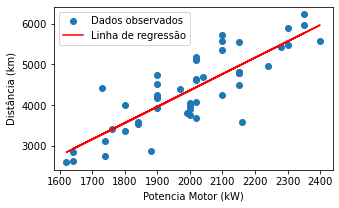

In [28]:
# Plotando os dados e a linha de regressão
plt.figure(figsize=(5, 3)) # Tamanho da figura
plt.scatter(X, y, label='Dados observados') # Diagrama de dispersão
plt.plot(X, y_pred, color='red', label='Linha de regressão') # Linha de regressão
plt.xlabel('Velocidade (mph)')
plt.xlabel('Potencia Motor (kW)')
plt.ylabel('Distância (km)')
plt.legend()
plt.show()